# Feature Engineering

Data Science - CA#05: *feature engineering* - Spring 1403 \
In this assignment, you are expected to apply feature engineering techniques to a football-related dataset to analyze the likelihood of scoring a goal through a shot. Next, you will delve into regression and cross-validation concepts further by implementing multivariate regression and k-fold cross-validation from scratch and utilize them on a preprocessed dataset related to cars.

## Preprocessing

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler

In [2]:
df = pd.read_csv('football.csv')

In [3]:
df.head(10)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal
5,m_147,p_118,open play,head,5.49,-1.50,1,0,low,40,15,missed chance
6,m_88,p_101,open play,head,14.46,-1.25,3,0,medium,88,8,missed chance
7,m_66,p_61,open play,head,8.98,4.99,1,0,low,10,29,missed chance
8,m_132,p_84,open play,left foot,23.44,-1.25,3,0,medium,58,45,blocked shot
9,m_99,p_30,open play,left foot,8.48,3.99,2,1,medium,43,55,blocked shot


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   matchId                8925 non-null   object 
 1   playerId               8925 non-null   object 
 2   playType               8925 non-null   object 
 3   bodyPart               8925 non-null   object 
 4   x                      8925 non-null   float64
 5   y                      8925 non-null   float64
 6   interveningOpponents   8925 non-null   int64  
 7   interveningTeammates   8925 non-null   int64  
 8   interferenceOnShooter  8891 non-null   object 
 9   minute                 8925 non-null   int64  
 10  second                 8925 non-null   int64  
 11  outcome                8891 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 836.8+ KB


### handling missing values:
As you can see features `interferenceOnShooter` and `outcome` have around 30 missing values. Since this number is not very high we can replace the NANs with appropriate statistical data. These features are categorical, so it's better to replace them with mode of each column.

In [5]:
for feature in ['interferenceOnShooter', 'outcome']:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   matchId                8925 non-null   object 
 1   playerId               8925 non-null   object 
 2   playType               8925 non-null   object 
 3   bodyPart               8925 non-null   object 
 4   x                      8925 non-null   float64
 5   y                      8925 non-null   float64
 6   interveningOpponents   8925 non-null   int64  
 7   interveningTeammates   8925 non-null   int64  
 8   interferenceOnShooter  8925 non-null   object 
 9   minute                 8925 non-null   int64  
 10  second                 8925 non-null   int64  
 11  outcome                8925 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 836.8+ KB


### dropping duplicates:

In [7]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [8]:
df.describe(include='all')

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
count,8925,8925,8925,8925,8925.000000,8925.000000,8925.000000,8925.000000,8925,8925.000000,8925.000000,8925
unique,240,160,4,4,NaN,NaN,NaN,NaN,3,NaN,NaN,5
top,m_99,p_61,open play,right foot,NaN,NaN,NaN,NaN,medium,NaN,NaN,missed chance
freq,52,74,8378,4454,NaN,NaN,NaN,NaN,4220,NaN,NaN,3504
mean,NaN,NaN,NaN,NaN,14.564631,0.364408,2.531989,0.336471,NaN,48.541401,29.243810,NaN
std,NaN,NaN,NaN,NaN,7.841865,8.999063,1.386693,0.680175,NaN,26.397998,17.306565,NaN
min,NaN,NaN,NaN,NaN,0.000000,-33.920000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,8.480000,-5.740000,2.000000,0.000000,NaN,26.000000,14.000000,NaN
50%,NaN,NaN,NaN,NaN,12.470000,0.500000,2.000000,0.000000,NaN,49.000000,29.000000,NaN
75%,NaN,NaN,NaN,NaN,20.950000,6.730000,3.000000,0.000000,NaN,71.000000,44.000000,NaN


### Visualizations
We use heatmap to have a better visualization of number of shots in each area of the football field. ،he point (0,0) is where the goal is located. 

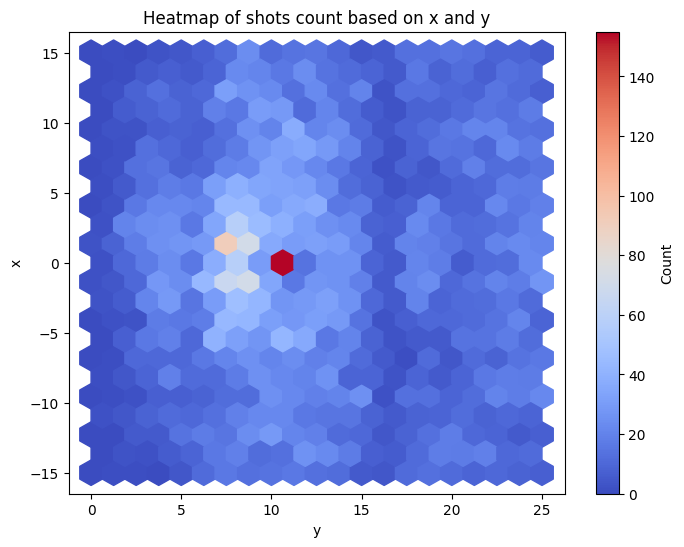

In [9]:
plt.figure(figsize=(8, 6))
hb = plt.hexbin(df['x'], df['y'], gridsize=20, cmap='coolwarm', extent=(0, 25, -15, 15))
cbar = plt.colorbar(hb)
cbar.set_label('Count')
plt.title('Heatmap of shots count based on x and y')
plt.xlabel('y')
plt.ylabel('x')
plt.show()

In [10]:
from ipywidgets import interact

@interact(body_part=list(df["bodyPart"].unique())+['all'],outcome=df['outcome'].unique())
def show_filtered_data(body_part='right foot',outcome='goal'):
    filter_df = df[((df['outcome'] == outcome)) & (( body_part=='all')|(df['bodyPart'] == body_part))]
    plt.figure(figsize=(8, 6))
    hb = plt.hexbin(filter_df['x'], filter_df['y'], gridsize=20, cmap='coolwarm', extent=(0, 25, -15, 15))
    cbar = plt.colorbar(hb)
    cbar.set_label('Count')
    plt.title('Heatmap of outcome with specified body part based on x and y')
    plt.xlabel('y')
    plt.ylabel('x')
    plt.show()

interactive(children=(Dropdown(description='body_part', options=('right foot', 'left foot', 'head', 'other', '…

As you can see, we have a lot of shots from penalty spot and therefore a lot of goals from that spot. But this does not necesserily mean that the probability of goal in that spot in higher. Next, we calculate the probability of goal in each area and use laplace smoothing to ensure unbiasedness.

In [11]:
def calculate_goal_probability(shots, goals, smoothing_factor=1):
    smoothed_goals = goals + smoothing_factor
    smoothed_shots = shots + smoothing_factor * 5 
    probability = smoothed_goals / smoothed_shots
    return probability

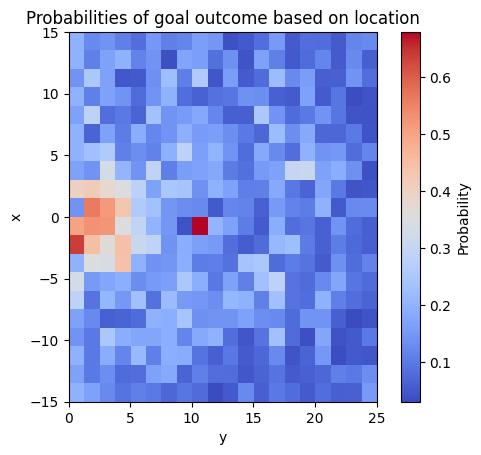

In [12]:
x_min, x_max = 0 , 25
y_min, y_max = -15, 15
goals_df = df[df['outcome'] == 'goal']
bins = 20
shots, xedges, yedges = np.histogram2d(df['x'], df['y'], bins=bins, range=[[x_min, x_max], [y_min, y_max]])
goals, xedges, yedges = np.histogram2d(goals_df['x'], goals_df['y'], bins=bins, range=[[x_min, x_max], [y_min, y_max]])

probability = calculate_goal_probability(shots, goals)
plt.figure()
plt.imshow(probability.T, cmap='coolwarm', extent=[x_min, x_max, y_min, y_max])
plt.colorbar(label='Probability')
plt.title('Probabilities of goal outcome based on location')
plt.xlabel('y')
plt.ylabel('x')
plt.show()

From the heatmap obove we can conclude that the probablity of goal in penalty spot is in fact higher thatn other parts. Plus, the probability of goal is higher near the goal.

### handling categorical data

In [13]:
def handle_categroical_data(_df):
    df = _df.copy(deep=True)
    for l in df.columns:
        if df[l].dtype.kind == 'O':
            categories = df[l].unique()
            if l == 'interferenceOnShooter':
                class_mapping = {'low': 0, 'medium': 1, 'high': 2}
                df[l] = df[l].map(class_mapping)
            else:
                df = pd.get_dummies(df, columns=[l])
            
    return df

In [14]:
df_encoded = handle_categroical_data(df)

In [15]:
df_encoded

,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,matchId_m_1,matchId_m_10,matchId_m_100,...,playType_penalty,bodyPart_head,bodyPart_left foot,bodyPart_other,bodyPart_right foot,outcome_blocked shot,outcome_goal,outcome_hit the post,outcome_missed chance,outcome_saved by keeper
0,13.47,-11.22,1,0,1,70,9,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,9.48,14.22,3,0,1,55,4,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,29.43,-1.25,6,2,0,86,31,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,26.93,1.00,4,1,1,77,2,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,10.72,5.24,2,0,1,76,46,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,6.48,3.99,3,0,2,69,50,0,0,0,...,0,1,0,0,0,0,0,0,1,0
8921,21.45,-8.73,4,1,1,15,53,0,0,0,...,0,0,0,0,1,1,0,0,0,0
8922,11.97,3.24,3,0,1,84,34,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8923,6.48,-6.98,1,0,2,4,39,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [16]:
df_encoded.describe()

,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,matchId_m_1,matchId_m_10,matchId_m_100,...,playType_penalty,bodyPart_head,bodyPart_left foot,bodyPart_other,bodyPart_right foot,outcome_blocked shot,outcome_goal,outcome_hit the post,outcome_missed chance,outcome_saved by keeper
count,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,...,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000
mean,14.564631,0.364408,2.531989,0.336471,0.784314,48.541401,29.243810,0.004482,0.005154,0.005154,...,0.014118,0.169748,0.324594,0.006611,0.499048,0.198431,0.121120,0.019496,0.392605,0.268347
std,7.841865,8.999063,1.386693,0.680175,0.693328,26.397998,17.306565,0.066800,0.071611,0.071611,...,0.117983,0.375432,0.468249,0.081041,0.500027,0.398841,0.326285,0.138267,0.488357,0.443124
min,0.000000,-33.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.480000,-5.740000,2.000000,0.000000,0.000000,26.000000,14.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.470000,0.500000,2.000000,0.000000,1.000000,49.000000,29.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20.950000,6.730000,3.000000,0.000000,1.000000,71.000000,44.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,70.820000,33.920000,11.000000,7.000000,2.000000,98.000000,59.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature selection
First, we train a simple KNN model on our data before training and calculate the accuracy, AUC-ROC Score and confusion matrix of the model before tuning.

ROC stands for Receiver Operating Characteristic, which is a graph that plots the performance of a binary classification model at different thresholds. The graph shows the relationship between the True Positive Rate (Sensitivity) and the False Positive Rate (1 - Specificity) at various threshold settings.

AUC stands for Area Under the Curve, which represents the area under the ROC curve. The AUC score is a single number that summarizes the performance of the model across all possible threshold settings.

The ROC-AUC score ranges from 0 to 1, where:

    1 represents a perfect classifier that correctly classifies all positive and negative instances.
    0.5 represents a random classifier that is no better than chance.
    Values below 0.5 indicate a worse-than-random classifier.

Accuracy: 0.8761904761904762
AUC-ROC Score: 0.5505115089514067


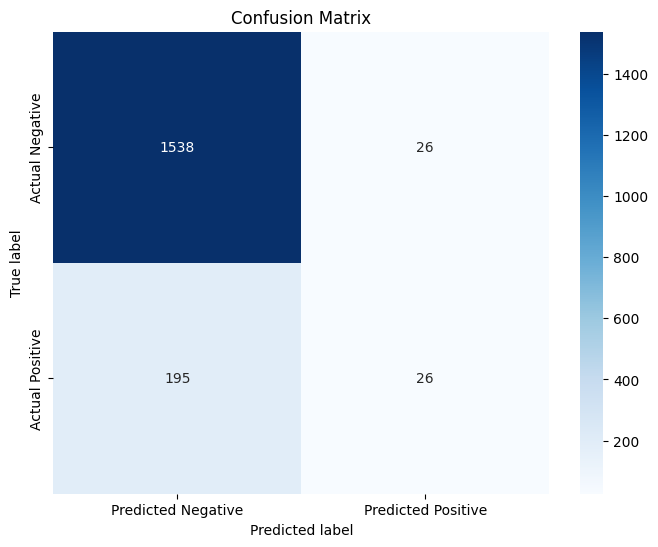

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=["outcome_goal"]) 
y = df_encoded["outcome_goal"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_roc)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], 
                       columns=['Predicted Negative', 'Predicted Positive'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


### Extracting new features

In [18]:
df_encoded['distance'] = (df_encoded['x'] ** 2 + df_encoded['y'] ** 2) ** 0.5

In [19]:
import numpy as np
teta = np.arctan((df_encoded['x'] * 7.32) / (df_encoded['x'] ** 2 + df_encoded['y'] ** 2 - (7.32/2) ** 2))

df_encoded['angles'] = np.degrees(teta)

negative_angles_indices = teta < 0
df_encoded.loc[negative_angles_indices, 'angles'] += 180

### Feature Importance
First we use mutual information classifer to find which features are best to train our model.

In [20]:
from sklearn.feature_selection import mutual_info_classif

X = df_encoded.drop(columns=["outcome_goal"]) 
y = df_encoded["outcome_goal"] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mi_scores = mutual_info_classif(X, y, discrete_features="auto", random_state=42)


feature_importances = pd.DataFrame(mi_scores, index=X.columns, columns=["Importance"])
feature_importances.sort_values(by="Importance", ascending=False, inplace=True)


feature_importances.head(10)

,Importance
outcome_missed chance,0.066900
angles,0.054854
distance,0.053696
outcome_saved by keeper,0.046076
x,0.042558
interveningOpponents,0.040432
y,0.030590
outcome_blocked shot,0.026411
playType_penalty,0.011059
interferenceOnShooter,0.009347


Finally, we select the best features and train our model again with the new features:

Accuracy: 0.9053221288515406
AUC-ROC Score: 0.7419830808577611


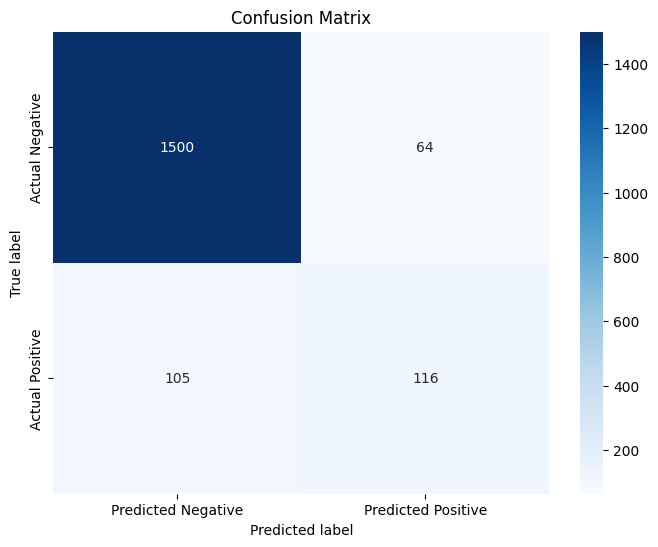

In [21]:
best_threshold = 0.04
selected_features = feature_importances[feature_importances["Importance"] > best_threshold].index.tolist()
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_roc)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], 
                       columns=['Predicted Negative', 'Predicted Positive'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

As you can see from the result, the accuracy is now 0.905 which is higher and also there is significant improvement in AUC-ROC which is now 0.19 higher.

## Multivariate Regression Implementation

Multiple regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multiple regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + ... + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, multiple regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{2m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{1} + \hat \beta_{2} x_{2} + \hat \beta_{3} x_{3} + \hat \beta_{4} x_{4} + ... + \hat \beta_{n} x_{n}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {1}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + ... + \hat \beta_{n} x_{jn})) x_{ji} $$



In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
CARS_DATASET = 'cars.csv'
PALETTE = ["#2E7B7C", "#3B9EA0", "#79CBCD", "#FFCAD4", "#FFBCDA", "#F39EC7", "#F765A3"]

In [25]:
class MultivariateLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def prepare_data(self, X, Y, random_state):
        X_train, X_test, self.y_train, self.y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        self.X_train_final = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
        self.X_test_final = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
                
    def fit(self):
        self.theta = np.zeros(self.X_train_final.shape[1])
        self.cost_history = []

        for i in range(self.n_iterations):
            y_pred = np.dot(self.X_train_final, self.theta)
            error = y_pred - self.y_train
            cost = np.mean(error**2) / 2
            self.cost_history.append(cost)
            gradient = np.dot(self.X_train_final.T, error) / len(self.y_train)
            self.theta -= self.learning_rate * gradient

    def predict(self):
        return np.dot(self.X_test_final, self.theta)
    
    def evaluate(self, y_pred):
        rmse = math.sqrt(mean_squared_error(self.y_test, y_pred))
        r2 = r2_score(self.y_test, y_pred)
        scores_df = pd.DataFrame(columns=['RMSE', 'R2_score'])
        scores_df.loc[0] = [rmse, r2]
        return scores_df
    
    def show_prediction_result(self, y_pred, y_name):
        plt.figure(figsize=(10, 6))
        plt.scatter(self.y_test, y_pred, color=PALETTE[6]) 
        plt.plot([min(self.y_test), max(self.y_test)], [min(self.y_test), max(self.y_test)], color=PALETTE[1], linestyle='--') 
        plt.xlabel('Actual ' + y_name)
        plt.ylabel('Predicted ' + y_name)
        plt.title('Actual vs. Predicted ' + y_name)
        plt.show()

    def show_learning_curve(self, y_name):
        plt.figure(figsize=(10, 6))
        plt.plot(range(self.n_iterations), self.cost_history, color=PALETTE[0])
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Gradient Descent Learning Curve (' + y_name + ')')
        plt.show()

    def plot_accuracy_across_random_states(self, X, y):
        random_states = [10, 20, 30, 40, 50, 60, 70]
        accuracies = []
        for state in random_states:
            self.prepare_data(X, y, state)
            self.fit()
            y_pred = self.predict()
            accuracy = np.corrcoef(self.y_test, y_pred)[0, 1] ** 2
            accuracies.append(accuracy)

        plt.figure(figsize=(8, 5))
        plt.plot(random_states, accuracies, marker='o', color=PALETTE[6])
        plt.xlabel('Random State')
        plt.ylabel('R-squared')
        plt.title('Model Accuracy Across Different Random States')
        plt.grid(True)
        plt.show()


In [26]:
data = pd.read_csv(CARS_DATASET)
X = data[['Sales in Thousands', 'Year Resale Value', 'Engine Size', 'Wheelbase', 'Width', 'Length', 'Curb Weight', 'Fuel Capacity', 'Fuel Efficiency', 'Power Perf Factor', 'Vehicle Type Car', 'Vehicle Type Passenger']]
y_price = data['Price in Thousands']
y_horsepower = data['Horsepower']

### Price in Thousands

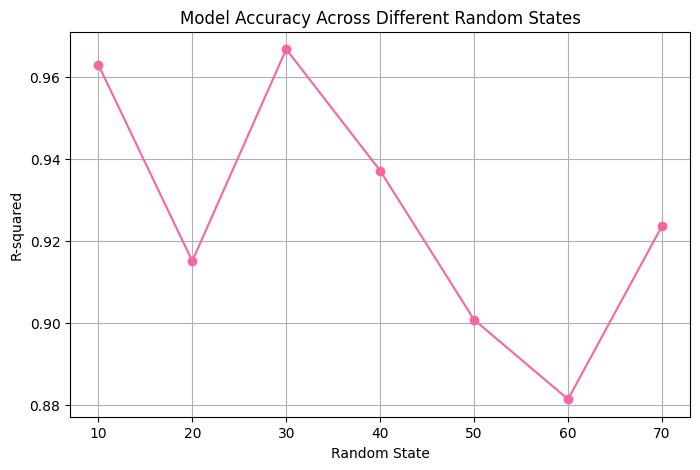

In [27]:
multivariate_model_price = MultivariateLinearRegression(learning_rate=0.1, n_iterations=150)
multivariate_model_price.plot_accuracy_across_random_states(X, y_price)

In [28]:
multivariate_model_price = MultivariateLinearRegression(learning_rate=0.1, n_iterations=150)
multivariate_model_price.prepare_data(X, y_price, 30)
multivariate_model_price.fit()
y_pred_price = multivariate_model_price.predict()

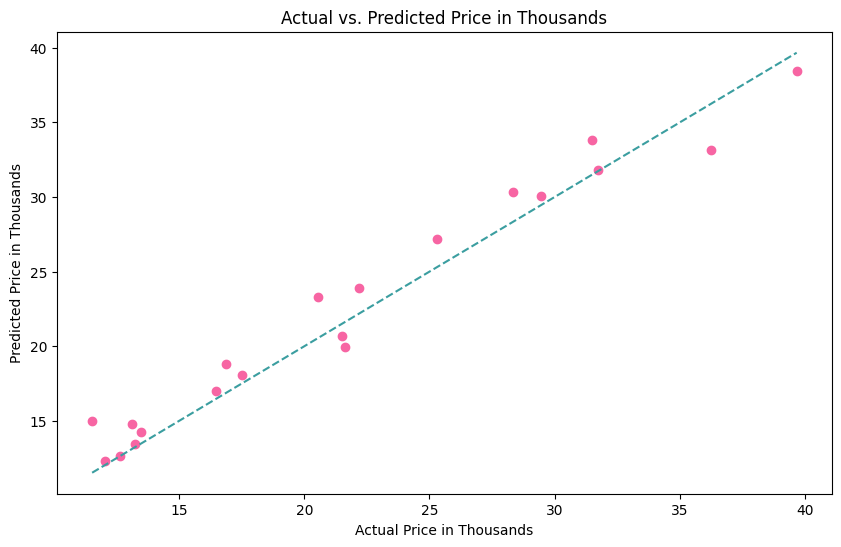

In [29]:
multivariate_model_price.show_prediction_result(y_pred_price, 'Price in Thousands')

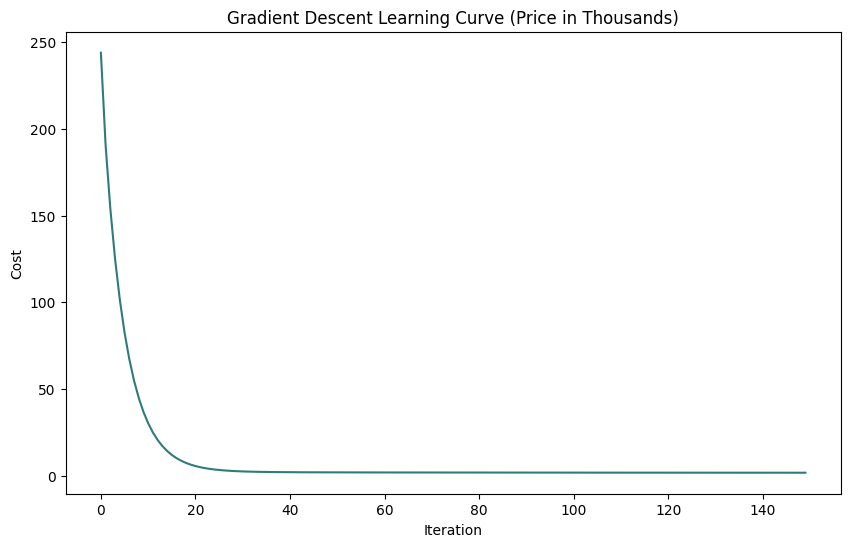

In [30]:
multivariate_model_price.show_learning_curve('Price in Thousands')

In [31]:
scores_df = multivariate_model_price.evaluate(y_pred_price)
scores_df

,RMSE,R2_score
0,1.705497,0.958711


### Horsepower

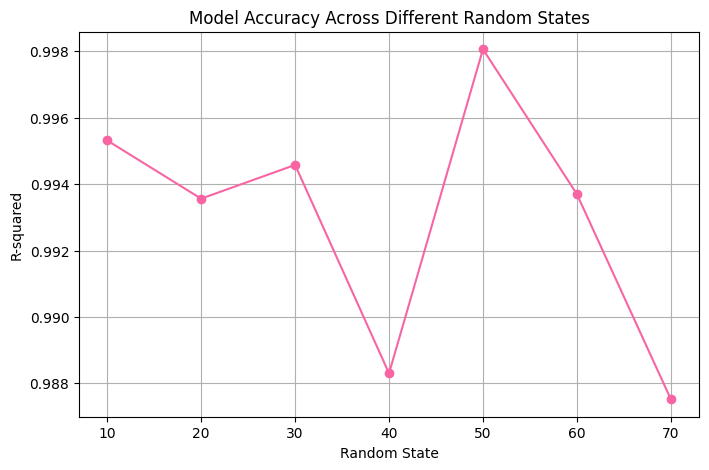

In [32]:
multivariate_model_hp = MultivariateLinearRegression(learning_rate=0.1, n_iterations=150)
multivariate_model_hp.plot_accuracy_across_random_states(X, y_horsepower)

In [33]:
multivariate_model_hp = MultivariateLinearRegression(learning_rate=0.1, n_iterations=150)
multivariate_model_hp.prepare_data(X, y_horsepower, 50)
multivariate_model_hp.fit()
y_pred_hp = multivariate_model_hp.predict()

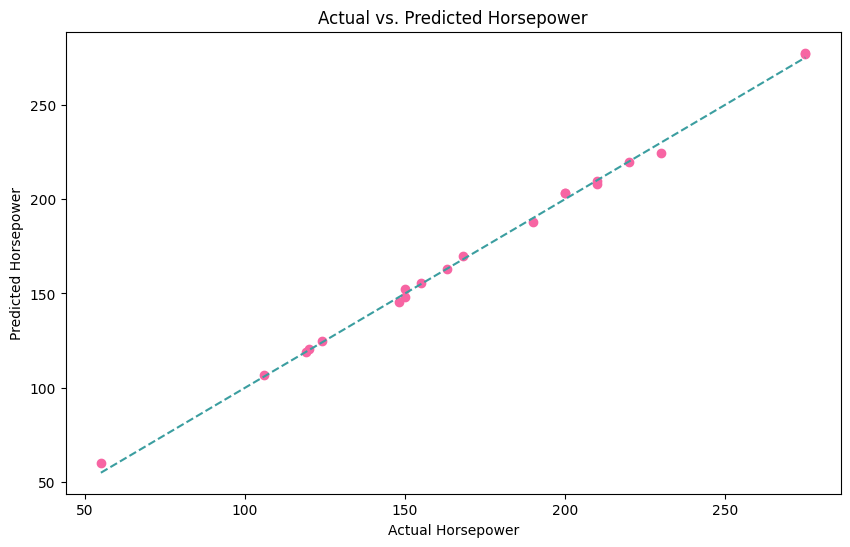

In [34]:
multivariate_model_hp.show_prediction_result(y_pred_hp, 'Horsepower')

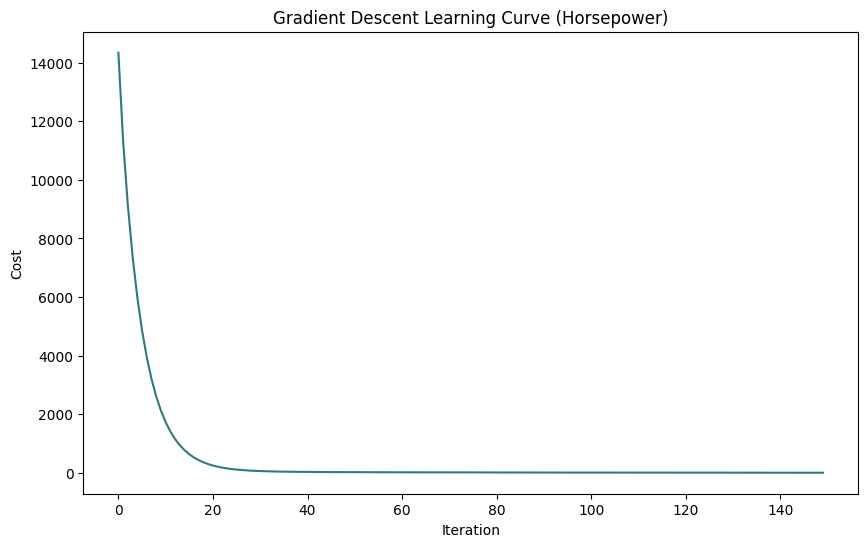

In [35]:
multivariate_model_hp.show_learning_curve('Horsepower')

In [36]:
scores_df = multivariate_model_hp.evaluate(y_pred_hp)
scores_df

,RMSE,R2_score
0,2.462969,0.997958


## Manual K-Fold Cross Validation Implementation

In K-Fold Cross Validation, we split the dataset into k number of subsets (known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose each time.

 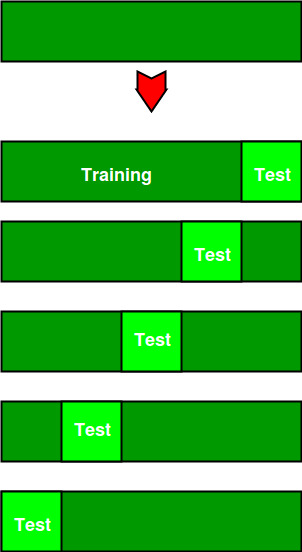 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import math

class KFoldCrossValidation:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None
        self.cost_history = None

    def prepare_data(self, X, Y, random_state):
        self.X = X
        self.Y = Y
        self.random_state = random_state
        self.cost_history = []

    def gradient_descent(self, X, Y):
        m = len(Y)
        n = X.shape[1]
        self.theta = np.zeros(n)

        for i in range(self.n_iterations):
            y_pred = np.dot(X, self.theta)
            error = y_pred - Y
            cost = np.mean(error ** 2) / 2
            self.cost_history.append(cost)
            gradient = (1/m) * np.dot(X.T, error)
            self.theta -= self.learning_rate * gradient

    def fit(self):
        np.random.seed(self.random_state)
        indices = np.arange(len(self.X))
        np.random.shuffle(indices)

        fold_size = len(self.X) // 5
        r2_scores_price = []
        mse_scores_price = []
        r2_scores_horsepower = []
        mse_scores_horsepower = []
        for i in range(5):
            test_indices = indices[i*fold_size:(i+1)*fold_size]
            train_indices = np.concatenate([indices[:i*fold_size], indices[(i+1)*fold_size:]])

            X_train, X_test = self.X.iloc[train_indices], self.X.iloc[test_indices]
            y_train, y_test = self.Y.iloc[train_indices], self.Y.iloc[test_indices]
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            X_train_final = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
            X_test_final = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

            self.gradient_descent(X_train_final, y_train)
            
            # Evaluate model for price prediction
            y_pred_price = np.dot(X_test_final, self.theta)
            r2_scores_price.append(r2_score(y_test, y_pred_price))
            mse_scores_price.append(mean_squared_error(y_test, y_pred_price))
            
            # Evaluate model for horsepower prediction
            y_train_horsepower = self.Y.iloc[train_indices]  # Updated line
            y_test_horsepower = self.Y.iloc[test_indices]  # Updated line
            self.gradient_descent(X_train_final, y_train_horsepower)
            y_pred_horsepower = np.dot(X_test_final, self.theta)
            r2_scores_horsepower.append(r2_score(y_test_horsepower, y_pred_horsepower))
            mse_scores_horsepower.append(mean_squared_error(y_test_horsepower, y_pred_horsepower))

        return r2_scores_price, mse_scores_price, r2_scores_horsepower, mse_scores_horsepower

    def predict(self, X):
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_final = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
        return np.dot(X_final, self.theta)

    def plot_predicted_vs_actual(self, model_name):
        y_pred = self.predict(self.X)
        plt.figure(figsize=(10, 6))
        plt.scatter(self.Y, y_pred, color=PALETTE[6])
        plt.plot([min(self.Y), max(self.Y)], [min(self.Y), max(self.Y)], color=PALETTE[1], linestyle='--')
        plt.xlabel('Actual ' + model_name)
        plt.ylabel('Predicted ' + model_name)
        plt.title('Actual vs. Predicted ' + model_name)
        plt.show()


    def plot_learning_curve(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(self.cost_history)), self.cost_history, color=PALETTE[0])
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Gradient Descent Learning Curve')
        plt.show()
        
    def evaluate(self):
        y_pred = self.predict(self.X)
        rmse = math.sqrt(mean_squared_error(self.Y, y_pred))
        r2 = r2_score(self.Y, y_pred)
        return rmse, r2


Load dataset, Initialize and train model for price and horsepower prediction:

In [38]:
data = pd.read_csv(CARS_DATASET)
X = data[['Sales in Thousands', 'Year Resale Value', 'Engine Size', 'Wheelbase', 'Width', 'Length', 'Curb Weight', 'Fuel Capacity', 'Fuel Efficiency', 'Power Perf Factor', 'Vehicle Type Car', 'Vehicle Type Passenger']]
y_price = data['Price in Thousands']
y_horsepower = data['Horsepower']

kfold_model_price = KFoldCrossValidation(learning_rate=0.1, n_iterations=150)
kfold_model_price.prepare_data(X, y_price, 30)
r2_scores_price, mse_scores_price, _, _ = kfold_model_price.fit()

kfold_model_horsepower = KFoldCrossValidation(learning_rate=0.1, n_iterations=150)
kfold_model_horsepower.prepare_data(X, y_horsepower, 30)
_, _, r2_scores_horsepower, mse_scores_horsepower = kfold_model_horsepower.fit()

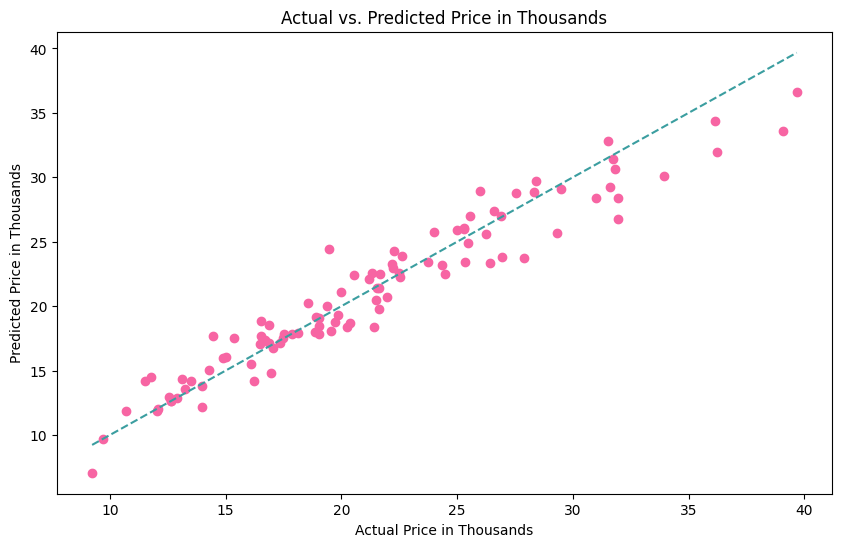

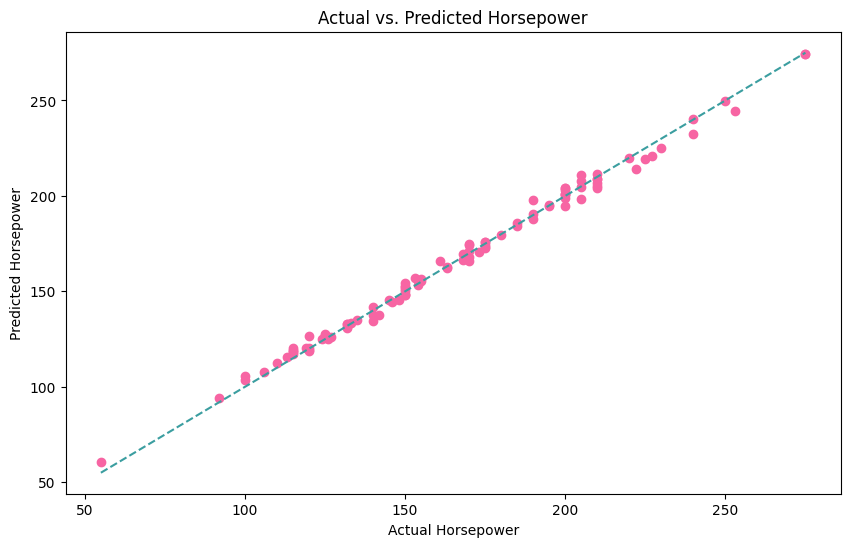

In [39]:
kfold_model_price.plot_predicted_vs_actual('Price in Thousands')
kfold_model_horsepower.plot_predicted_vs_actual('Horsepower')


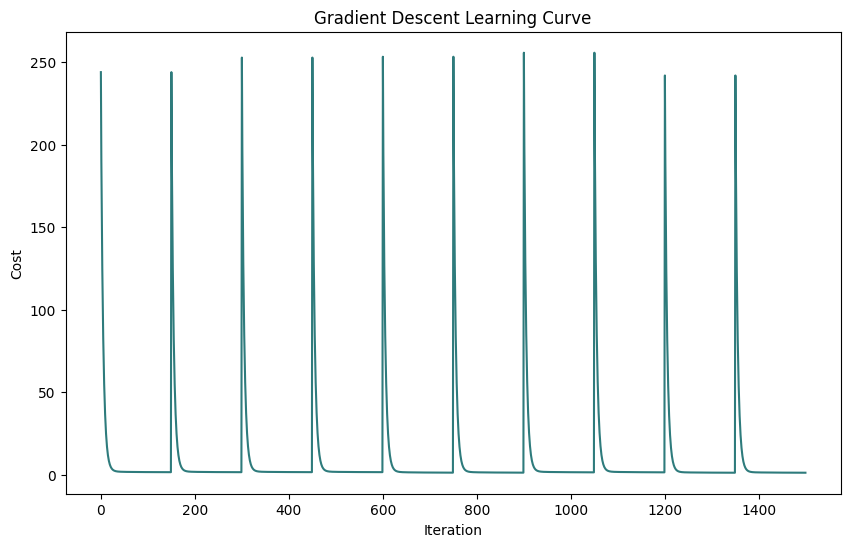

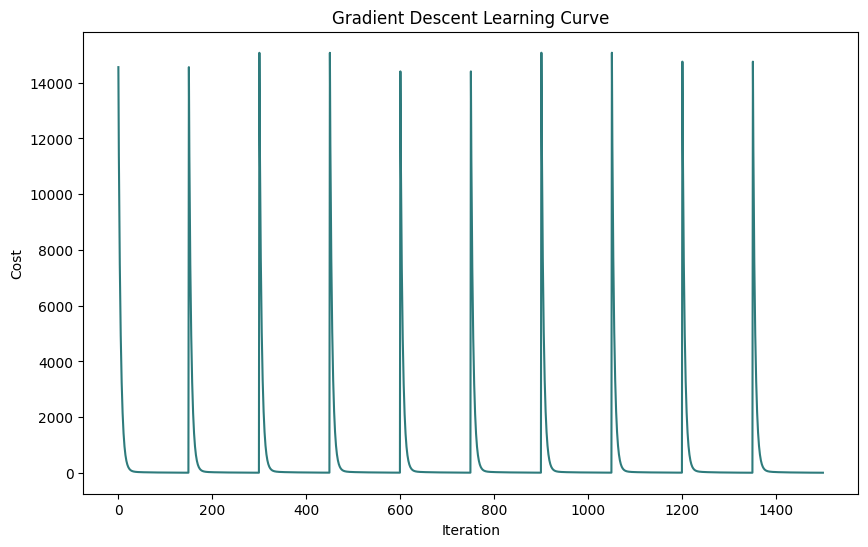

In [40]:
kfold_model_price.plot_learning_curve()
kfold_model_horsepower.plot_learning_curve()


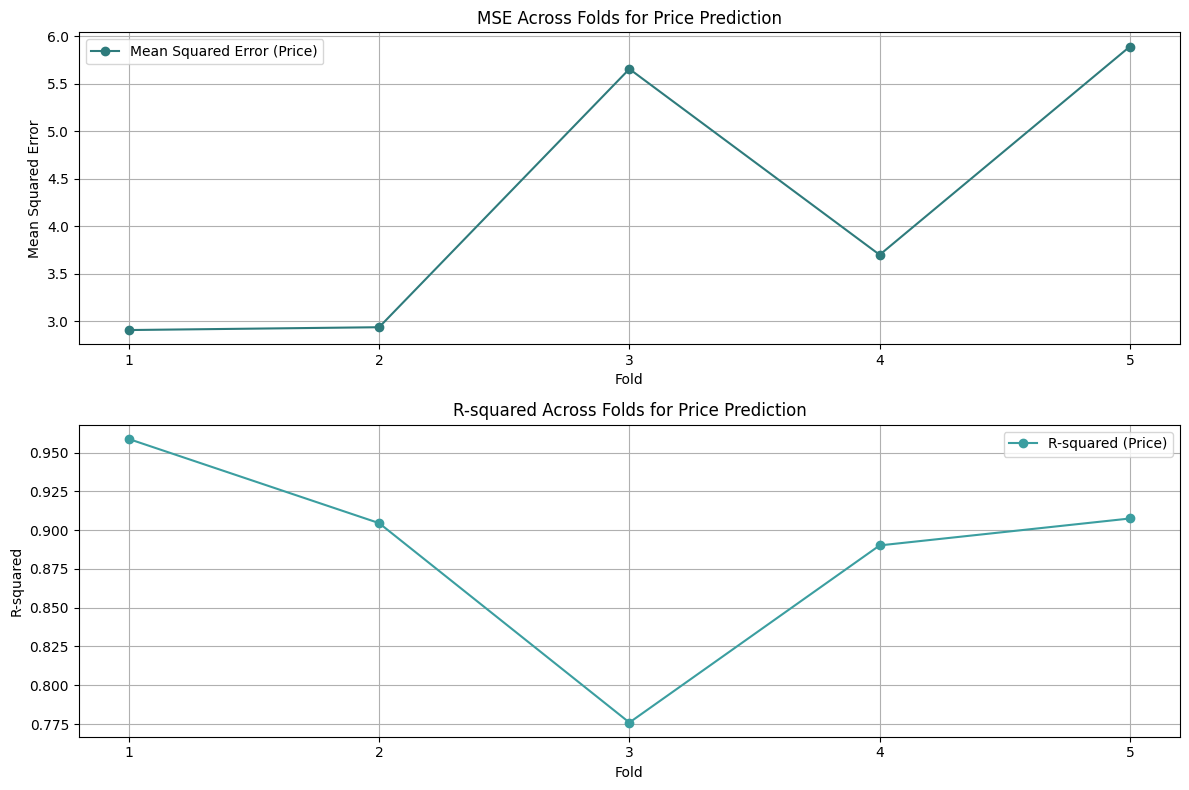

In [41]:

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(range(1, 6), mse_scores_price, marker='o', color=PALETTE[0], label='Mean Squared Error (Price)')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('MSE Across Folds for Price Prediction')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(range(1, 6), r2_scores_price, marker='o', color=PALETTE[1], label='R-squared (Price)')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('R-squared Across Folds for Price Prediction')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


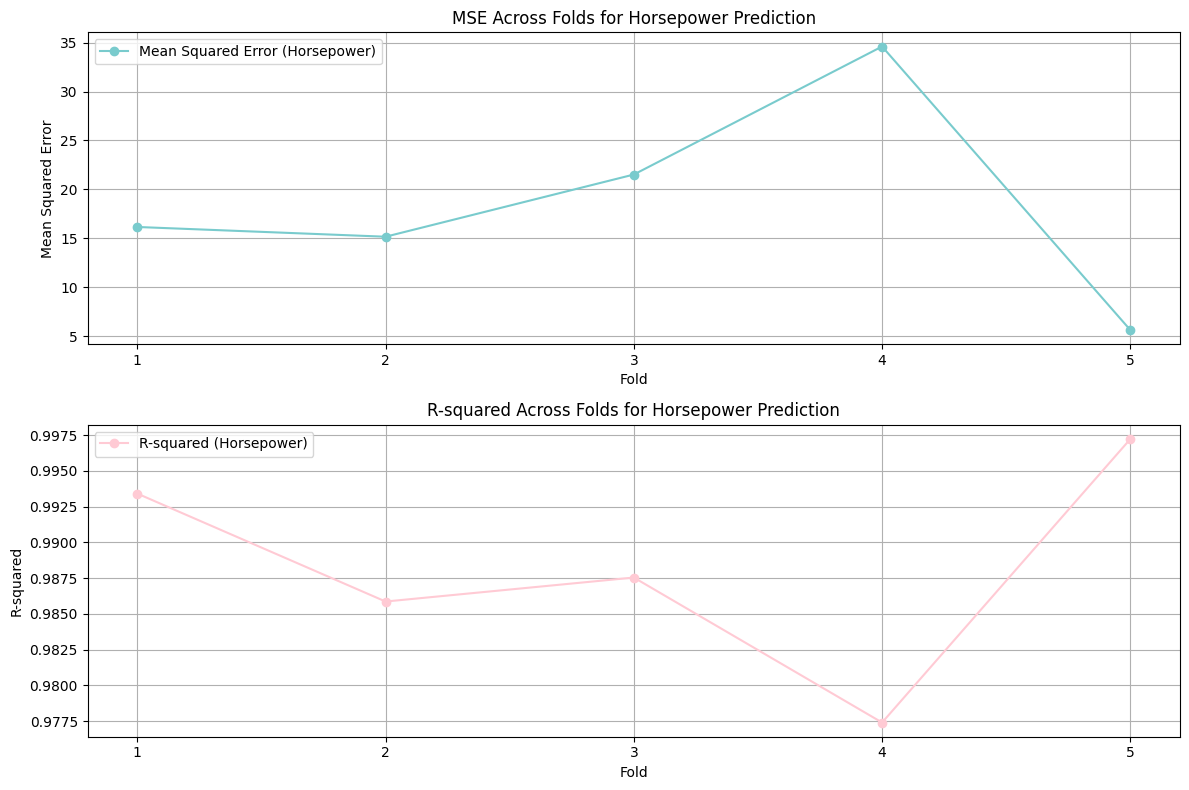

In [42]:

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(range(1, 6), mse_scores_horsepower, marker='o', color=PALETTE[2], label='Mean Squared Error (Horsepower)')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('MSE Across Folds for Horsepower Prediction')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(range(1, 6), r2_scores_horsepower, marker='o', color=PALETTE[3], label='R-squared (Horsepower)')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('R-squared Across Folds for Horsepower Prediction')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [43]:
print("r2_scores_price", r2_scores_price)
print("mse_scores_price", mse_scores_price)
print("r2_scores_hp",r2_scores_horsepower)
print("mse_scores_hp", mse_scores_horsepower)

r2_scores_price [0.9587109333199278, 0.9044990037051996, 0.7759790758567365, 0.8901413884273217, 0.9074874083712904]
mse_scores_price [2.9087206963815375, 2.938474970871203, 5.656994855951721, 3.700566603526775, 5.893254924306455]
r2_scores_hp [0.9934087027444799, 0.9858605325818555, 0.9875384995061212, 0.9773979479029395, 0.9972256463575582]
mse_scores_hp [16.17034716575174, 15.175183406523598, 21.524002113047313, 34.59470093976081, 5.64750201809112]


In [44]:
rmse_price_custom, r2_price_custom= kfold_model_price.evaluate()
print("Price Prediction - RMSE Builtin:", rmse_price_custom)
print("Price Prediction - R^2 score Builtin:", r2_price_custom)

rmse_horsepower_custom, r2_horsepower_custom = kfold_model_horsepower.evaluate()
print("Horsepower Prediction - RMSE Builtin:", rmse_horsepower_custom)
print("Horsepower Prediction - R^2 score Builtin:", r2_horsepower_custom)

Price Prediction - RMSE Builtin: 1.8535252216927594
Price Prediction - R^2 score Builtin: 0.9239787416012107
Horsepower Prediction - RMSE Builtin: 3.2643389717156372
Horsepower Prediction - R^2 score Builtin: 0.9940648893586101


## Comparison with Built-in Python Libraries

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import math

CARS_DATASET = 'cars.csv'

class MultivariateLinearRegressionKFoldBuiltin:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None
        self.cost_history = None

    def prepare_data(self, X, Y, random_state):
        self.X = X
        self.Y = Y
        self.random_state = random_state
        self.cost_history = []

    def fit(self):
        kf = KFold(n_splits=5, shuffle=True, random_state=self.random_state)
        for train_index, test_index in kf.split(self.X):
            X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
            y_train, y_test = self.Y.iloc[train_index], self.Y.iloc[test_index]
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            X_train_final = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
            X_test_final = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

            self.theta = np.zeros(X_train_final.shape[1])

            for i in range(self.n_iterations):
                y_pred = np.dot(X_train_final, self.theta)
                error = y_pred - y_train
                cost = np.mean(error ** 2) / 2
                self.cost_history.append(cost)
                gradient = np.dot(X_train_final.T, error) / len(y_train)
                self.theta -= self.learning_rate * gradient

    def predict(self, X):
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_final = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
        return np.dot(X_final, self.theta)

    def evaluate(self):
        y_pred = self.predict(self.X)
        rmse = math.sqrt(mean_squared_error(self.Y, y_pred))
        r2 = r2_score(self.Y, y_pred)
        return rmse, r2


Initialize and train python built-in model for price prediction and horse-power and evaluate them

In [46]:
model_price_builtin = MultivariateLinearRegressionKFoldBuiltin(learning_rate=0.1, n_iterations=150)
model_price_builtin.prepare_data(X, y_price, 30)
model_price_builtin.fit()

model_horsepower_builtin = MultivariateLinearRegressionKFoldBuiltin(learning_rate=0.1, n_iterations=150)
model_horsepower_builtin.prepare_data(X, y_horsepower, 30)
model_horsepower_builtin.fit()

In [47]:
rmse_price_builtin, r2_price_builtin = model_price_builtin.evaluate()
print("Price Prediction - RMSE Builtin:", rmse_price_builtin)
print("Price Prediction - R^2 score Builtin:", r2_price_builtin)

rmse_horsepower_builtin, r2_horsepower_builtin = model_horsepower_builtin.evaluate()
print("Horsepower Prediction - RMSE Builtin:", rmse_horsepower_builtin)
print("Horsepower Prediction - R^2 score Builtin:", r2_horsepower_builtin)


Price Prediction - RMSE Builtin: 1.85352522169276
Price Prediction - R^2 score Builtin: 0.9239787416012106
Horsepower Prediction - RMSE Builtin: 3.264338971715636
Horsepower Prediction - R^2 score Builtin: 0.9940648893586101


As it appeares, the performance metrices' values are the same.

## Questions

### 1. Describe your strategy for addressing challenges such as handling missing values and categorical features. Could you also elaborate on your feature selection metrics and explain the rationale behind them?

For missing values, since the number of NANs in each row is not very high we replace the NANs with appropriate statistical data. These features are categorical, so we replace them with mode of each column. For categorical data, the column `interferenceOnShooter` is ordinal; so we assign a number to each category (`low`: 0, `medium`: 1, `high`: 2) For other categorical columns, we use get_dummies which is an implementation for onehot encoding.

One of the metrics we used is mutual information. Mutual information is a concept from information theory that measures the amount of information that one random variable contains about another random variable. In the context of data analysis and machine learning, mutual information is often used as a metric to quantify the relationship between two variables. It quantifies the amount of information gained about the target variable when the feature variable is known. Features with high mutual information are considered to be highly relevant to the target variable and we selected them to continue tuning the model.

Some evaluation metrics we used were accuracy and AUC-ROC Score to see how good the performance of our model is. 
The ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The AUC-ROC score quantifies the overall performance of the model across all possible threshold settings. It ranges from 0 to 1, where a score of 1 indicates perfect discrimination (the model perfectly separates the positive and negative instances), while a score of 0.5 indicates that the model performs no better than random chance.

### 2. Why didn’t we use regression to predict whether a shot would result in a goal?

While regression can handle numerical data well, it might not be the best choice for handling categorical data. plus, the relationship between the predictors (such as x, y coordinates, intervening opponents, teammates, etc.) and the outcome (goal or not) might not be linear. In such cases, regression might not capture the complexity of the relationship accurately. Another reason is that the dataset might have an imbalance in the number of goals versus missed chances or other outcomes. If there are significantly more instances of one outcome (e.g., missed chances) than another (e.g., goals), it can skew the model's predictions and lead to poor performance which is true here, we have more goal instances than other outcomes. Regression models often assume that the residuals (the differences between the observed and predicted values) are normally distributed and have constant variance. These assumptions might not hold true for the given data, leading to unreliable predictions.

### 3. How would you go about verifying the accuracy of the given formula used to calculate the shot angle in the preprocessing section?

We use sine and cosine law to get the tangent of the shot angle and then calculate A using arctan. if A is negative we add pi to make it positive.

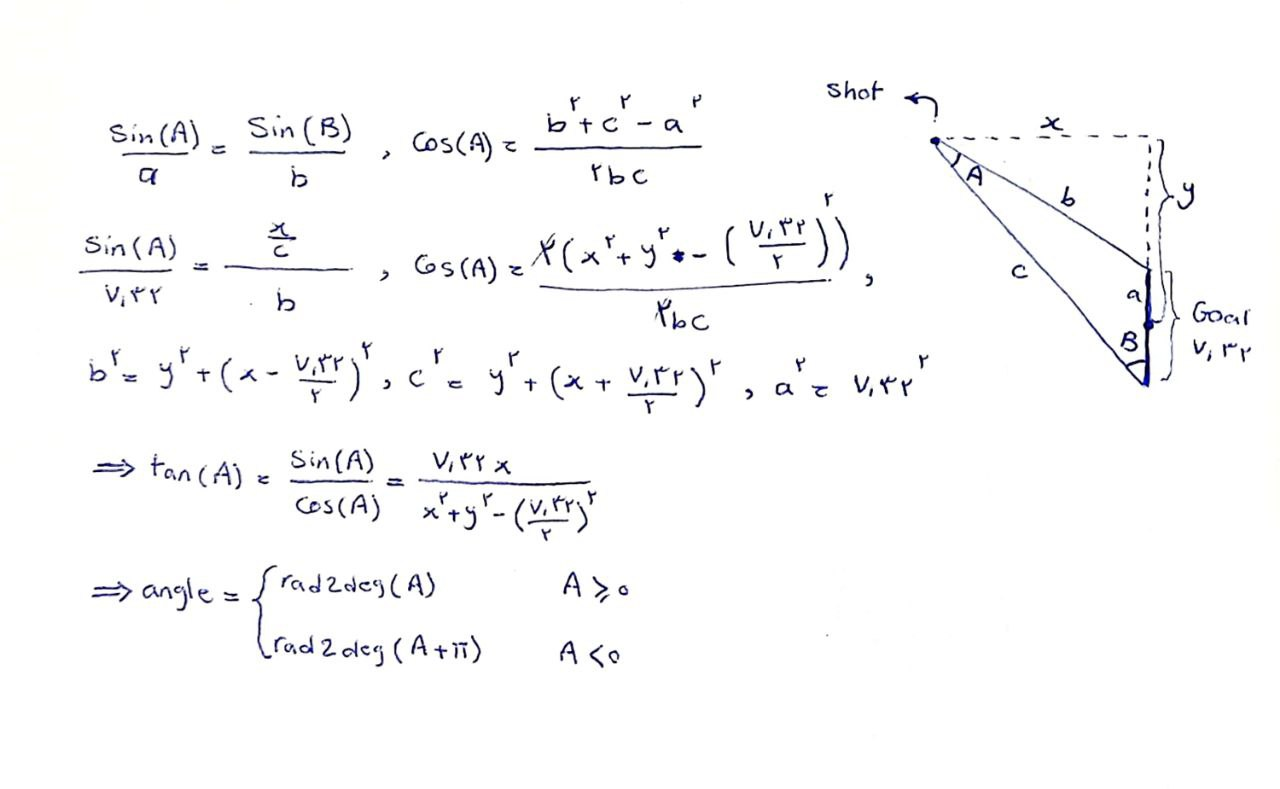

### 4. Discuss the advantages and disadvantages of k-fold cross-validation. Can you also explain other types of cross-validation methods that could address the limitations and issues associated with k-fold cross-validation?

#### *Advantages:*
K-fold cross-validation has several advantages for predictive analytics, such as reducing the variance of the performance estimate and allowing you to use more data for training. It also helps you avoid overfitting, as it exposes your model to different subsets of the data. Furthermore, it enables you to compare different models and parameters, providing a consistent and fair way of evaluation.

#### *Disadvantages:*
K-fold cross-validation has some drawbacks that need to be considered. It increases the computational cost and time, as it requires training and testing the model multiple times. Additionally, it may not be suitable for some types of data, such as time-series or spatial data, due to the order or location of the observations. Furthermore, it may introduce bias if the data is not well distributed or balanced across the folds. Lastly, it may not account for the uncertainty or variability of the model's performance, as it only gives a point estimate.

#### *Types of cross-validation:*
The choice of technique depends on the size and nature of the data, as well as the specific requirements of the modeling problem.

The major drawback of this method is that it leads to higher variation in the testing model as we are testing against one data point. If the data point is an outlier it can lead to higher variation. Another drawback is it takes a lot of execution time as it iterates over ‘the number of data points’ times.

1. `Holdout Validation`
In Holdout Validation, we perform training on the 50% of the given dataset and rest 50% is used for the testing purpose. It’s a simple and quick way to evaluate a model. The major drawback of this method is that we perform training on the 50% of the dataset, it may possible that the remaining 50% of the data contains some important information which we are leaving while training our model i.e. higher bias.

2. `LOOCV (Leave One Out Cross Validation)`
In this method, we perform training on the whole dataset but leaves only one data-point of the available dataset and then iterates for each data-point. In LOOCV, the model is trained on n-1    samples and tested on the one omitted sample, repeating this process for each data point in the dataset. It has some advantages as well as disadvantages also.
An advantage of using this method is that we make use of all data points and hence it is low bias.

3. `Stratified Cross-Validation`
It is a technique used in machine learning to ensure that each fold of the cross-validation process maintains the same class distribution as the entire dataset. This is particularly important when dealing with imbalanced datasets, where certain classes may be underrepresented. In this method, The dataset is divided into k folds while maintaining the proportion of classes in each fold.
During each iteration, one-fold is used for testing, and the remaining folds are used for training.
The process is repeated k times, with each fold serving as the test set exactly once.
Stratified Cross-Validation is essential when dealing with classification problems where maintaining the balance of class distribution is crucial for the model to generalize well to unseen data.

### 5. What metrics did you use to evaluate your manual implementations of multivariate regression and k-fold cross-validation, and why did you choose them?